# 📊 Value at Risk (VaR) using Monte Carlo Simulation
This notebook estimates Value at Risk (VaR) using a simple Monte Carlo simulation for a stock portfolio.

In [1]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
np.random.seed(42)

In [2]:
# Step 2: Set up portfolio and assumptions
initial_investment = 1_000_000  # ₹10 lakh portfolio
mean_return = 0.001  # daily mean return ~0.1%
volatility = 0.02     # daily volatility ~2%
days = 1             # 1-day VaR
simulations = 100_000

# Simulate daily returns using normal distribution
simulated_returns = np.random.normal(loc=mean_return, scale=volatility, size=simulations)

# Calculate simulated portfolio values
portfolio_values = initial_investment * (1 + simulated_returns)

In [3]:
# Step 3: Calculate VaR at 95% and 99% confidence levels
losses = initial_investment - portfolio_values
VaR_95 = np.percentile(losses, 5)
VaR_99 = np.percentile(losses, 1)

print(f"Estimated 1-day VaR at 95% confidence: ₹{VaR_95:,.0f}")
print(f"Estimated 1-day VaR at 99% confidence: ₹{VaR_99:,.0f}")

Estimated 1-day VaR at 95% confidence: ₹-34,010
Estimated 1-day VaR at 99% confidence: ₹-47,452


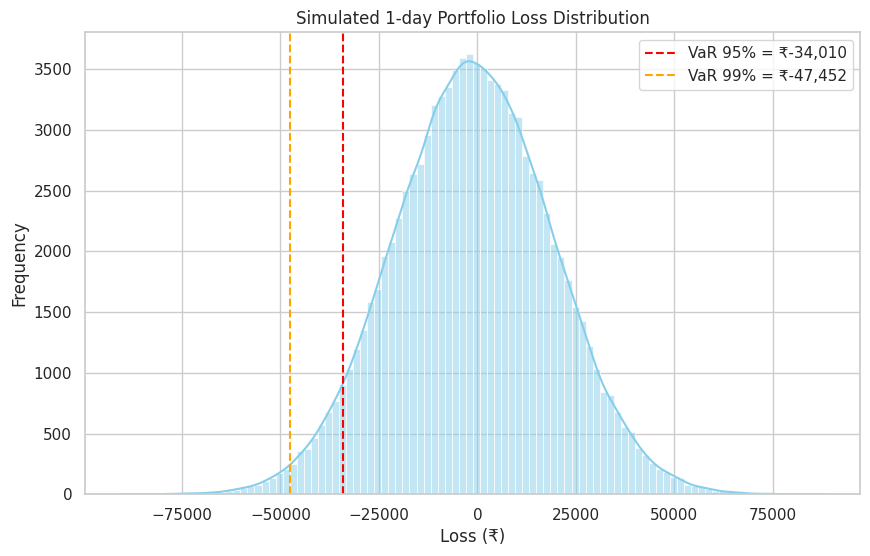

In [4]:
# Step 4: Plot the distribution of simulated losses
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(losses, bins=100, kde=True, color="skyblue")
plt.axvline(VaR_95, color='red', linestyle='--', label=f'VaR 95% = ₹{VaR_95:,.0f}')
plt.axvline(VaR_99, color='orange', linestyle='--', label=f'VaR 99% = ₹{VaR_99:,.0f}')
plt.title('Simulated 1-day Portfolio Loss Distribution')
plt.xlabel('Loss (₹)')
plt.ylabel('Frequency')
plt.legend()
plt.show()